In [1]:
using HTTP, CSV, DataFrames, StringEncodings, Plots

In [2]:
CONTENT_URL = "https://www.mhlw.go.jp/content/"

"https://www.mhlw.go.jp/content/"

In [3]:
OPEN_DATA_URL = "https://covid19.mhlw.go.jp/public/opendata/"

"https://covid19.mhlw.go.jp/public/opendata/"

In [4]:
POS_CSV = "newly_confirmed_cases_daily.csv"

"newly_confirmed_cases_daily.csv"

In [5]:
TST_CSV = "pcr_tested_daily.csv" 

"pcr_tested_daily.csv"

In [6]:
SVR_CSV = "severe_cases_daily.csv"

"severe_cases_daily.csv"

In [7]:
DTH_CSV = "deaths_cumulative_daily.csv"

"deaths_cumulative_daily.csv"

In [8]:
DL_DIR = "./data/"

"./data/"

In [9]:
HTTP.download(string(OPEN_DATA_URL, POS_CSV), DL_DIR)

┌ Info: Downloading
│   source = "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv"
│   dest = "./data/newly_confirmed_cases_daily.csv"
│   progress = 1.0
│   time_taken = "0.05 s"
│   time_remaining = "0.0 s"
│   average_speed = "3.927 MiB/s"
│   downloaded = "184.985 KiB"
│   remaining = "0 bytes"
└   total = "184.985 KiB"


"./data/newly_confirmed_cases_daily.csv"

In [10]:
HTTP.download(string(CONTENT_URL, TST_CSV), DL_DIR)

┌ Info: Downloading
│   source = "https://www.mhlw.go.jp/content/pcr_tested_daily.csv"
│   dest = "./data/pcr_tested_daily.csv"
│   progress = 1.0
│   time_taken = "0.0 s"
│   time_remaining = "0.0 s"
│   average_speed = "18.064 MiB/s"
│   downloaded = "18.497 KiB"
│   remaining = "0 bytes"
└   total = "18.497 KiB"


"./data/pcr_tested_daily.csv"

In [11]:
HTTP.download(string(OPEN_DATA_URL, SVR_CSV), DL_DIR)

┌ Info: Downloading
│   source = "https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv"
│   dest = "./data/severe_cases_daily.csv"
│   progress = 1.0
│   time_taken = "0.05 s"
│   time_remaining = "0.0 s"
│   average_speed = "2.559 MiB/s"
│   downloaded = "120.526 KiB"
│   remaining = "0 bytes"
└   total = "120.526 KiB"


"./data/severe_cases_daily.csv"

In [12]:
HTTP.download(string(OPEN_DATA_URL, DTH_CSV), DL_DIR)

┌ Info: Downloading
│   source = "https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv"
│   dest = "./data/deaths_cumulative_daily.csv"
│   progress = 1.0
│   time_taken = "0.03 s"
│   time_remaining = "0.0 s"
│   average_speed = "6.815 MiB/s"
│   downloaded = "181.452 KiB"
│   remaining = "0 bytes"
└   total = "181.452 KiB"


"./data/deaths_cumulative_daily.csv"

In [13]:
ENCODING = enc"UTF-8"

UTF-8 string encoding

In [14]:
RATE_LIMIT = 10.0

10.0

In [15]:
pos_sum = 0

0

In [16]:
dth_sum = 0

0

In [17]:
function read_csv(file_path)
    df = CSV.File(open(read, file_path, ENCODING)) |> DataFrame
    return df
end

read_csv (generic function with 1 method)

In [18]:
df_pos = read_csv(string(DL_DIR, POS_CSV))

Row,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2020/1/16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020/1/17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020/1/18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020/1/19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2020/1/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020/1/21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2020/1/22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2020/1/23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2020/1/24,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_tst = read_csv(string(DL_DIR, TST_CSV))

Row,日付,PCR 検査実施人数(単日)
,String15,Int64?
1,2020/2/5,4
2,2020/2/6,19
3,2020/2/7,9
4,2020/2/8,4
5,2020/2/9,10
6,2020/2/10,12
7,2020/2/11,4
8,2020/2/12,10
9,2020/2/13,16


In [20]:
df_svr = read_csv(string(DL_DIR, SVR_CSV))

Row,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2020/5/9,267,23,0,0,0,0,0,0,3,0,2,10,12,83,30,0,0,0,3,1,2,1,2,5,0,1,0,56,23,0,0,0,0,0,0,0,0,0,2,0,0,1,0,2,0,0,0,5
2,2020/5/10,249,28,0,0,0,0,0,0,3,0,2,11,12,71,30,0,0,0,2,1,2,1,2,0,0,0,0,50,24,0,0,0,0,0,0,0,0,0,2,0,0,1,0,2,0,0,0,5
3,2020/5/11,243,26,0,0,0,0,0,0,2,0,2,9,11,65,31,0,0,0,3,1,2,1,2,5,0,0,0,50,24,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,0,0,0,5
4,2020/5/12,259,24,0,0,0,0,2,0,2,5,2,9,12,56,34,0,2,4,2,1,2,1,2,4,0,1,3,50,20,0,0,0,1,0,3,0,0,0,0,0,11,0,0,2,0,0,0,4
5,2020/5/13,245,19,0,0,0,0,2,2,2,5,2,9,11,52,34,0,2,3,2,1,2,1,2,4,0,1,3,45,21,0,0,0,1,0,1,1,0,0,0,0,11,0,0,2,0,0,0,4
6,2020/5/14,237,18,0,0,0,0,2,2,2,5,1,8,13,54,34,0,2,3,2,1,2,1,2,4,0,1,1,43,18,0,0,0,1,0,1,1,0,0,0,0,10,0,0,1,0,0,0,4
7,2020/5/15,232,17,0,0,0,0,2,2,2,5,1,8,11,53,34,0,2,3,2,1,2,1,2,4,0,1,1,41,19,0,0,0,1,0,1,1,0,0,0,0,10,0,0,1,0,0,0,4
8,2020/5/16,230,18,0,0,0,0,2,2,1,5,1,8,11,55,34,0,2,3,2,1,2,1,2,2,0,1,1,39,19,0,0,0,1,0,1,1,0,0,0,0,10,0,0,1,0,0,0,4
9,2020/5/17,228,17,0,0,0,0,2,2,1,5,1,8,11,54,34,0,2,3,2,1,2,1,2,2,0,1,1,39,17,0,0,0,1,0,1,1,0,0,2,0,10,0,0,1,0,0,0,4


In [21]:
df_dth = read_csv(string(DL_DIR, DTH_CSV))

Row,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2020/5/9,613,48,0,0,1,0,0,0,9,0,18,41,39,180,47,0,13,16,8,0,0,6,1,34,1,1,13,59,32,2,2,0,0,0,2,0,0,0,3,3,24,0,1,3,1,0,0,5
2,2020/5/10,621,51,0,0,1,0,0,0,9,0,18,42,40,180,47,0,13,16,8,0,0,6,1,34,1,1,13,59,34,2,2,0,0,0,2,0,1,0,3,3,24,0,1,3,1,0,0,5
3,2020/5/11,643,56,0,0,1,0,0,0,9,0,18,42,40,189,50,0,14,17,8,0,0,6,1,34,1,1,13,61,34,2,3,0,0,0,2,0,1,0,3,3,24,0,1,3,1,0,0,5
4,2020/5/12,668,62,0,0,1,0,0,0,9,0,18,43,40,196,57,0,15,19,8,0,0,6,1,34,1,1,13,61,34,2,3,0,0,0,2,0,1,0,3,3,24,0,1,3,1,0,0,6
5,2020/5/13,687,68,0,0,1,0,0,0,9,0,18,44,40,203,59,0,16,19,8,0,0,6,1,34,1,1,13,62,35,2,3,0,0,0,2,0,1,0,3,3,24,0,1,3,1,0,0,6
6,2020/5/14,710,70,0,0,1,0,0,0,9,0,18,45,40,212,62,0,18,20,8,0,0,7,1,34,1,1,13,63,37,2,3,0,0,0,2,0,1,0,3,3,25,0,1,3,1,0,0,6
7,2020/5/15,725,72,0,0,1,0,0,0,9,0,18,45,42,219,63,0,18,20,8,0,0,7,1,34,1,1,13,66,37,2,3,0,0,0,2,0,1,0,3,3,25,0,1,3,1,0,0,6
8,2020/5/16,744,73,0,0,1,0,0,0,9,0,18,46,42,230,63,0,18,21,8,0,0,7,1,34,1,1,13,70,38,2,3,0,0,0,2,0,1,0,3,3,25,0,1,3,1,0,0,6
9,2020/5/17,749,74,0,0,1,0,0,0,9,0,18,46,42,237,63,0,18,21,8,0,0,7,1,34,1,1,13,70,38,2,3,0,0,0,2,0,1,0,3,3,25,0,1,0,1,0,0,6


In [22]:
function get_pos_sum(x)
    global pos_sum += x
    return pos_sum
end

get_pos_sum (generic function with 1 method)

In [23]:
function get_dth_day(x)
    global dth_sum
    y = dth_sum
    dth_sum = x
    return x - y
end

get_dth_day (generic function with 1 method)

In [24]:
df_pos = df_pos[:, [:"Date",:"ALL"]]

Row,Date,ALL
,String15,Int64
1,2020/1/16,1
2,2020/1/17,0
3,2020/1/18,0
4,2020/1/19,0
5,2020/1/20,0
6,2020/1/21,0
7,2020/1/22,0
8,2020/1/23,0
9,2020/1/24,1


In [25]:
df_svr = df_svr[:, [:"Date",:"ALL"]]

Row,Date,ALL
,String15,Int64
1,2020/5/9,267
2,2020/5/10,249
3,2020/5/11,243
4,2020/5/12,259
5,2020/5/13,245
6,2020/5/14,237
7,2020/5/15,232
8,2020/5/16,230
9,2020/5/17,228


In [26]:
df_dth = df_dth[:, [:"Date",:"ALL"]]

Row,Date,ALL
,String15,Int64
1,2020/5/9,613
2,2020/5/10,621
3,2020/5/11,643
4,2020/5/12,668
5,2020/5/13,687
6,2020/5/14,710
7,2020/5/15,725
8,2020/5/16,744
9,2020/5/17,749


In [27]:
rename!(df_pos, [:"日付",:"PCR 検査陽性者数(単日)"])

Row,日付,PCR 検査陽性者数(単日)
,String15,Int64
1,2020/1/16,1
2,2020/1/17,0
3,2020/1/18,0
4,2020/1/19,0
5,2020/1/20,0
6,2020/1/21,0
7,2020/1/22,0
8,2020/1/23,0
9,2020/1/24,1


In [28]:
rename!(df_svr, [:"日付",:"重症者数"])

Row,日付,重症者数
,String15,Int64
1,2020/5/9,267
2,2020/5/10,249
3,2020/5/11,243
4,2020/5/12,259
5,2020/5/13,245
6,2020/5/14,237
7,2020/5/15,232
8,2020/5/16,230
9,2020/5/17,228


In [29]:
df_svr[:, "重症者数(※50倍)"] = map(x -> (50 * x), df_svr[:, "重症者数"])

1032-element Vector{Int64}:
 13350
 12450
 12150
 12950
 12250
 11850
 11600
 11500
 11400
 10650
 10500
  9750
  8800
     ⋮
  9700
  9150
  8650
  8600
  8500
  8300
  8000
  7050
  6500
  6550
  6600
  6550

In [30]:
rename!(df_dth, [:"日付",:"死亡者数"])

Row,日付,死亡者数
,String15,Int64
1,2020/5/9,613
2,2020/5/10,621
3,2020/5/11,643
4,2020/5/12,668
5,2020/5/13,687
6,2020/5/14,710
7,2020/5/15,725
8,2020/5/16,744
9,2020/5/17,749


In [31]:
df_pos[:, "累積感染者数"] = map(x -> get_pos_sum(x), df_pos[:, :"PCR 検査陽性者数(単日)"])

1146-element Vector{Int64}:
        1
        1
        1
        1
        1
        1
        1
        1
        2
        3
        4
        4
        7
        ⋮
 32885725
 32892243
 32907156
 32919567
 32924948
 32939472
 32953422
 32964928
 32975450
 32985881
 32994612
 32998875

In [32]:
df_tmp = innerjoin(df_pos, df_tst, on = :日付)

Row,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施人数(単日)
,String15,Int64,Int64,Int64?
1,2020/2/5,2,15,4
2,2020/2/6,0,15,19
3,2020/2/7,0,15,9
4,2020/2/8,0,15,4
5,2020/2/9,0,15,10
6,2020/2/10,0,15,12
7,2020/2/11,1,16,4
8,2020/2/12,1,17,10
9,2020/2/13,3,20,16


In [33]:
df_tmp2 = innerjoin(df_tmp, df_svr, on = :日付)

Row,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施人数(単日),重症者数,重症者数(※50倍)
,String15,Int64,Int64,Int64?,Int64,Int64
1,2020/5/9,108,15696,2265,267,13350
2,2020/5/10,66,15762,3995,249,12450
3,2020/5/11,58,15820,5993,243,12150
4,2020/5/12,87,15907,288,259,12950
5,2020/5/13,55,15962,10074,245,12250
6,2020/5/14,99,16061,5866,237,11850
7,2020/5/15,55,16116,3092,232,11600
8,2020/5/16,56,16172,4337,230,11500
9,2020/5/17,29,16201,4987,228,11400


In [34]:
df_dth[:, "死亡者数(単日)"] = map(x -> get_dth_day(x), df_dth[:, "死亡者数"])

1032-element Vector{Int64}:
 613
   8
  22
  25
  19
  23
  15
  19
   5
  14
   8
   6
  19
   ⋮
 116
  83
  72
  62
  52
  67
  99
  87
  67
  81
  50
  34

In [35]:
df_dth[:, "死亡者数(単日)(※50倍)"] = map(x -> (50 * x), df_dth[:, "死亡者数(単日)"])

1032-element Vector{Int64}:
 30650
   400
  1100
  1250
   950
  1150
   750
   950
   250
   700
   400
   300
   950
     ⋮
  5800
  4150
  3600
  3100
  2600
  3350
  4950
  4350
  3350
  4050
  2500
  1700

In [36]:
df = innerjoin(df_tmp2, df_dth, on = :日付)

Row,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施人数(単日),重症者数,重症者数(※50倍),死亡者数,死亡者数(単日),死亡者数(単日)(※50倍)
,String15,Int64,Int64,Int64?,Int64,Int64,Int64,Int64,Int64
1,2020/5/9,108,15696,2265,267,13350,613,613,30650
2,2020/5/10,66,15762,3995,249,12450,621,8,400
3,2020/5/11,58,15820,5993,243,12150,643,22,1100
4,2020/5/12,87,15907,288,259,12950,668,25,1250
5,2020/5/13,55,15962,10074,245,12250,687,19,950
6,2020/5/14,99,16061,5866,237,11850,710,23,1150
7,2020/5/15,55,16116,3092,232,11600,725,15,750
8,2020/5/16,56,16172,4337,230,11500,744,19,950
9,2020/5/17,29,16201,4987,228,11400,749,5,250


In [37]:
df[:, "陽性率"] = df[:, "PCR 検査陽性者数(単日)"] ./ df[:, "PCR 検査実施人数(単日)"]

1017-element Vector{Float64}:
 0.04768211920529802
 0.016520650813516898
 0.00967795761722009
 0.3020833333333333
 0.005459598967639468
 0.016876917831571768
 0.01778783958602846
 0.012912151256629006
 0.005815119310206537
 0.005016722408026756
 0.009934802856255821
 0.010084491687108205
 0.009825327510917031
 ⋮
 0.2515444704629478
 0.1660395226653368
 0.2225027774972225
 0.17249963760580334
 0.22362786440456342
 0.30891782255953937
 0.2420042237521252
 0.17625212613648877
 0.12447407372874442
 0.16170710571923744
 0.14776664885272467
 0.2786202853234317

In [38]:
function get_rate_limited(rate)
    global RATE_LIMIT
    if rate > RATE_LIMIT
        rate = RATE_LIMIT
    end
    return rate
end

get_rate_limited (generic function with 1 method)

In [39]:
df[:, "陽性率"] = map(x -> get_rate_limited(x), df[:, "陽性率"])

1017-element Vector{Float64}:
 0.04768211920529802
 0.016520650813516898
 0.00967795761722009
 0.3020833333333333
 0.005459598967639468
 0.016876917831571768
 0.01778783958602846
 0.012912151256629006
 0.005815119310206537
 0.005016722408026756
 0.009934802856255821
 0.010084491687108205
 0.009825327510917031
 ⋮
 0.2515444704629478
 0.1660395226653368
 0.2225027774972225
 0.17249963760580334
 0.22362786440456342
 0.30891782255953937
 0.2420042237521252
 0.17625212613648877
 0.12447407372874442
 0.16170710571923744
 0.14776664885272467
 0.2786202853234317

In [40]:
df[:, "致死率"] = df[:, "死亡者数"] ./ df[:, "累積感染者数"]

1017-element Vector{Float64}:
 0.03905453618756371
 0.039398553483060525
 0.04064475347661188
 0.04199409065191425
 0.04303971933341687
 0.044206462860344936
 0.044986348969967734
 0.04600544150383379
 0.046231714091722734
 0.047008810301275336
 0.04740822726434237
 0.047668711656441716
 0.048699908228816154
 ⋮
 0.0021472924386283553
 0.002151959722893448
 0.0021559535236500386
 0.0021596875245156427
 0.0021629750861801543
 0.002165194940953567
 0.0021672200503744287
 0.0021718169925445457
 0.002175649427906533
 0.0021787109547120004
 0.002181534687510905
 0.0021838468447242425

In [41]:
println(df)

1017×11 DataFrame
  Row │ 日付        PCR 検査陽性者数(単日)  累積感染者数  PCR 検査実施人数(単日)  重症者数  重症者数(※50倍)  死亡者数  死亡者数(単日)  死亡者数(単日)(※50倍)  陽性率        致死率     
      │ String15    Int64                   Int64         Union{Missing, Int64}   Int64     Int64            Int64     Int64           Int64                  Float64       Float64    
──────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 2020/5/9                       108         15696                    2265       267            13350       613             613                  30650   0.0476821    0.0390545
    2 │ 2020/5/10                       66         15762                    3995       249            12450       621               8                    400   0.0165207    0.0393986
    3 │ 2020/5/11                       58         15820                    5993       243            12150       643     

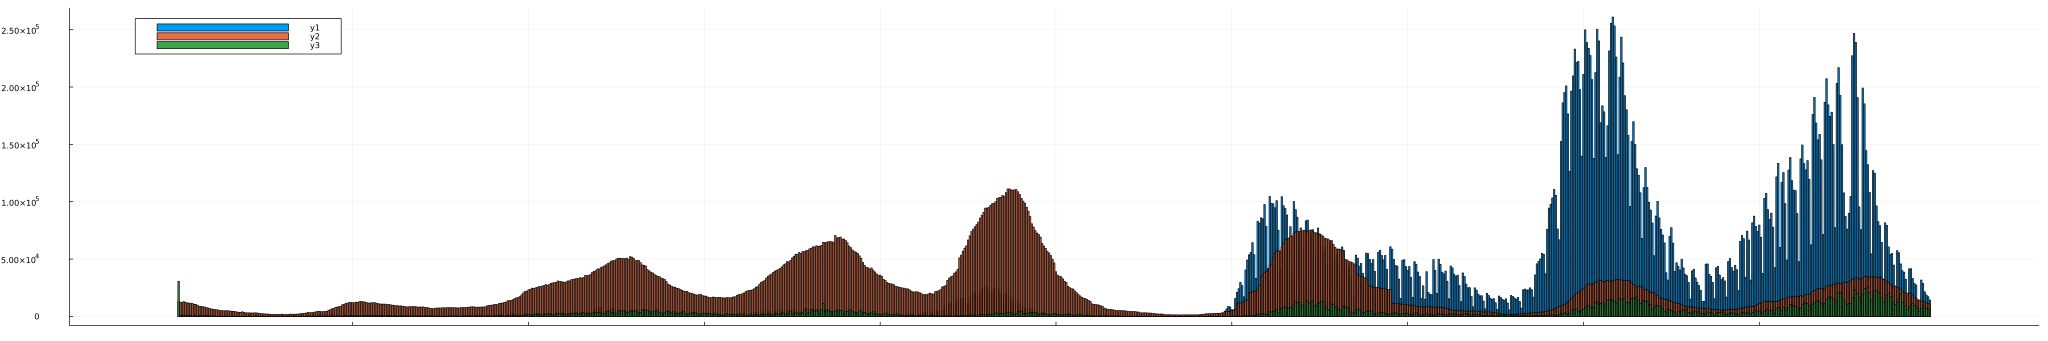

In [42]:
plot!(plot!(plot(
    df[:, "日付"], df[:, "PCR 検査陽性者数(単日)"], st=:bar, size=(3000, 500)),
    df[:, "日付"], df[:, "重症者数(※50倍)"], st=:bar, size=(3000, 500)),
    df[:, "日付"], df[:, "死亡者数(単日)(※50倍)"], st=:bar, size=(3000, 500))

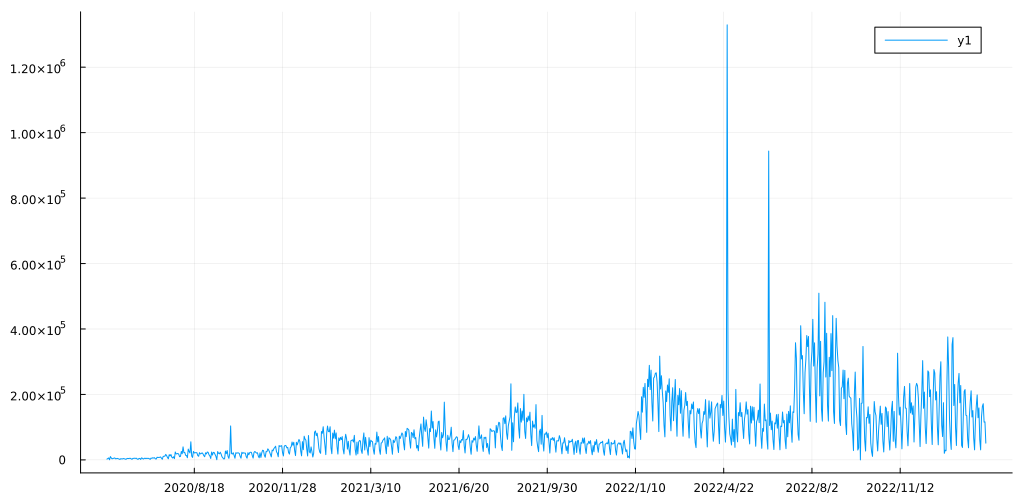

In [43]:
plot(df[:, "日付"], df[:, "PCR 検査実施人数(単日)"], size=(1024, 500))

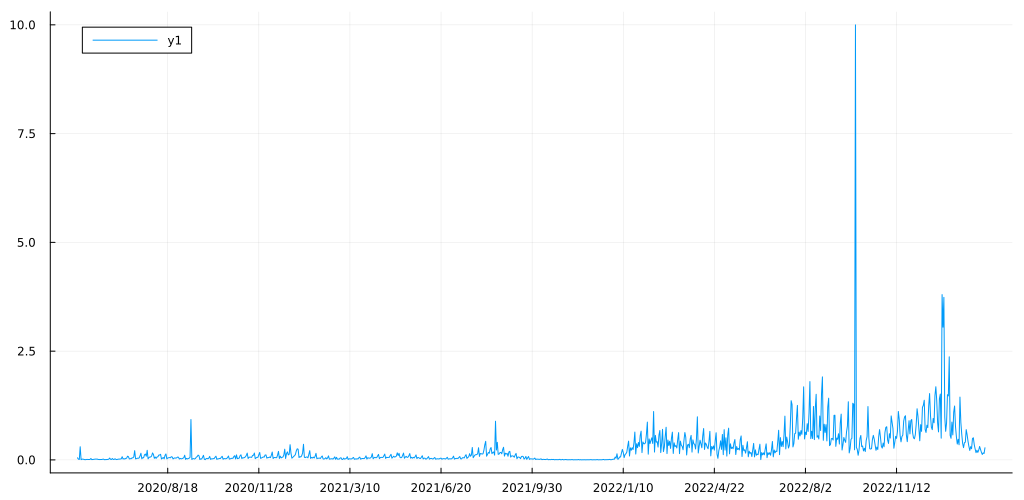

In [44]:
plot(df[:, "日付"], df[:, "陽性率"], size=(1024, 500))

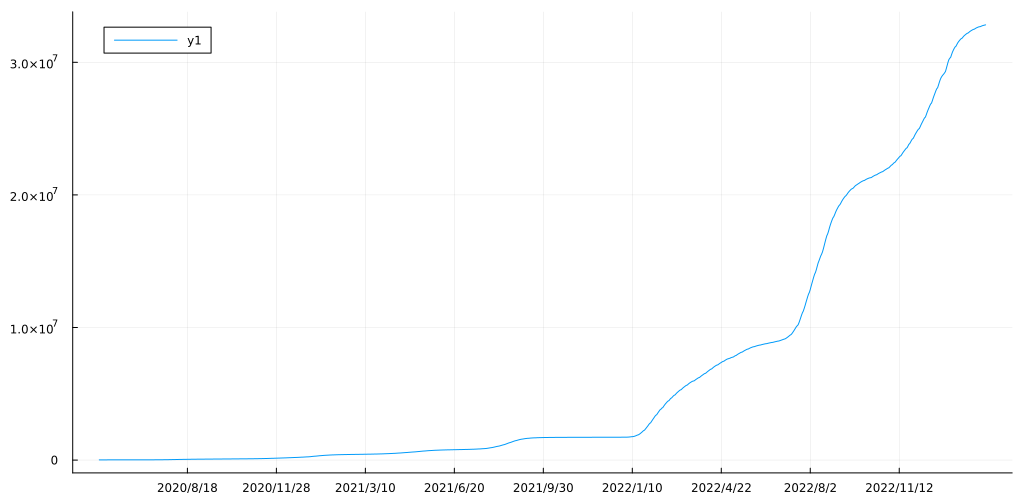

In [45]:
plot(df[:, "日付"], df[:, "累積感染者数"], size=(1024, 500))

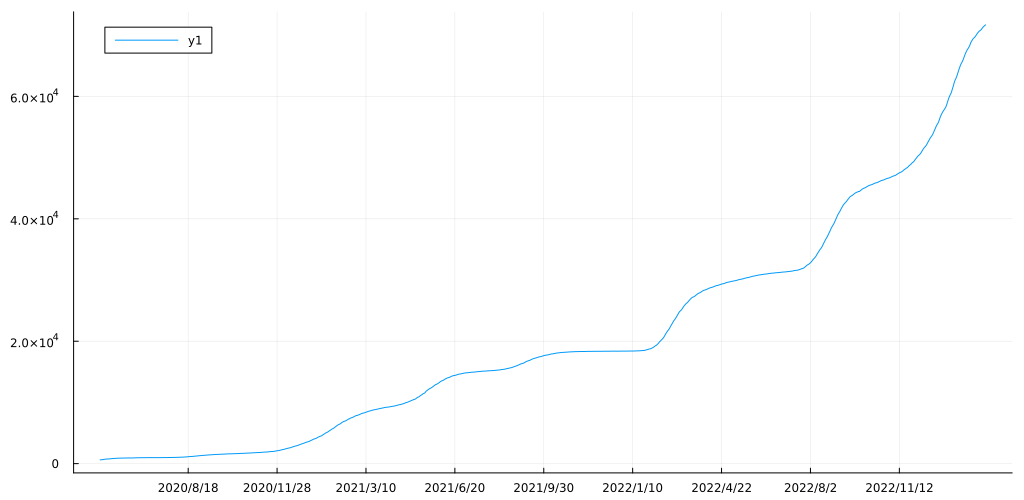

In [46]:
plot(df[:, "日付"], df[:, "死亡者数"], size=(1024, 500))

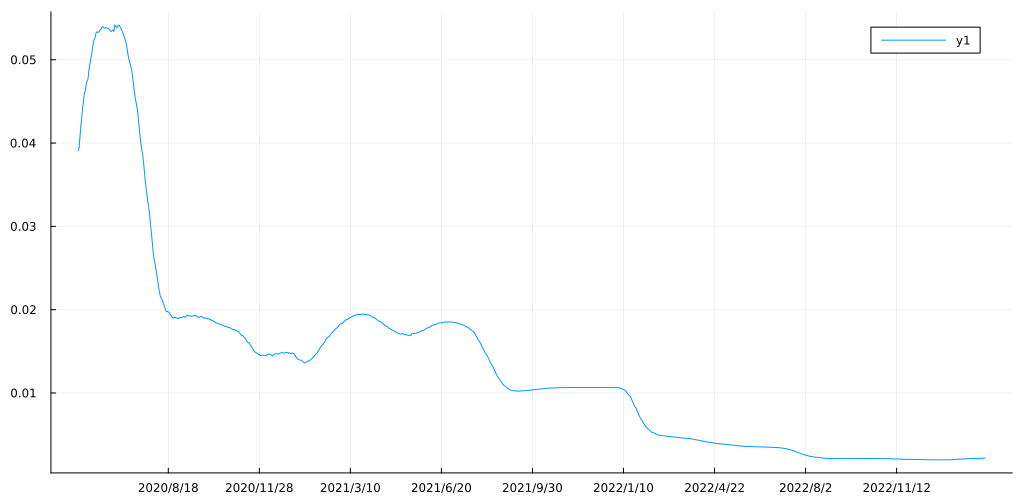

In [47]:
plot(df[:, "日付"], df[:, "致死率"], size=(1024, 500))